In [1]:
from os import sys
from pathlib import Path
p_fusystem = Path.cwd().parent.parent
sys.path.append(str(p_fusystem))

from fusystem.algebra.dispersion import deduction_dispersion_in_plasma as de

from sympy import init_printing; init_printing()
from sympy import pi

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # display series expression in one cell

## Wave Equation
The tensor coefficient matrix in electromagnetic wave equation 

$$\mathit{k}\times(\mathit{k}\times \tilde{\mathit{E}}) + k_0^2 \mathbf{\kappa}\cdot \tilde{\mathit{E}}=\mathit{0}$$

$$
\left(\begin{bmatrix}
-k_z^2 &  & k_x k_z \\ 
 & -k_x^2-k_z^2 & \\ 
 k_x k_z &  & -k_x^2
\end{bmatrix} + k_0^2
\begin{bmatrix}
\kappa_\perp & -j \kappa_\times & \\ 
\kappa_\times & \kappa_\perp  & \\ 
 &  & \kappa_\parallel
\end{bmatrix}\right)\cdot 
\begin{bmatrix}
\tilde{E}_x\\ 
\tilde{E}_y\\ 
\tilde{E}_z
\end{bmatrix} = 
\begin{bmatrix}
0\\ 
0\\ 
0
\end{bmatrix}$$

$$
\mathbf{T}\cdot 
\begin{bmatrix}
\tilde{E}_x\\ 
\tilde{E}_y\\ 
\tilde{E}_z
\end{bmatrix} = 
\begin{bmatrix}
0\\ 
0\\ 
0
\end{bmatrix}
$$

You can acquire the *sympy.Array* representation of the above (tensor) matrix coefficients by the following tensor_in_wave_equation() method of the class *deduction_disperion_in_plasma*. For the relevant variable, you can get them by *deduction_disperion_in_plasma.variable_name*, *e.g.*, deduction_disperion_in_plasma.k_x.

In [2]:
de.tensor_in_wave_equation()

⎡    2              2      2                           2                      
⎢  k₀ ⋅κ_\perp - k_y  - k_z      - ⅈ⋅\kappa_{\times}⋅k₀  + kₓ⋅k_y             
⎢                                                                             
⎢                    2                 2             2      2                 
⎢ⅈ⋅\kappa_{\times}⋅k₀  + kₓ⋅k_y      k₀ ⋅κ_\perp - kₓ  - k_z                 k
⎢                                                                             
⎢                                                                    2        
⎣            kₓ⋅k_z                          k_y⋅k_z               k₀ ⋅κ_\para

                 ⎤
kₓ⋅k_z           ⎥
                 ⎥
                 ⎥
_y⋅k_z           ⎥
                 ⎥
         2      2⎥
llel - kₓ  - k_y ⎦

The solve procedure, *i.e.* $\text{det}(\mathbf{T})=0$, requires several seconds to complete, so it is set to be run only once and cache the result to prevent repeated solving request. Users would observe a enormous speedup at the second run of *solve_N2_with_theta_and_kappa_component()* method.

The function returns the solutions of $N^2(\omega, \theta)$.

In [3]:
%%timeit -n1 # run onces (1 loop each run) in each run
de.solve_N2_with_theta_and_kappa_component()

The slowest run took 5717033.76 times longer than the fastest. This could mean that an intermediate result is being cached.
1.2 s ± 2.93 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [4]:
%%timeit
de.solve_N2_with_theta_and_kappa_component()

351 ns ± 10.9 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


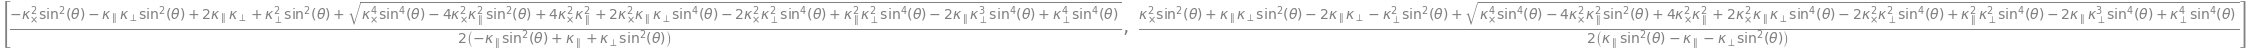

In [5]:
de.solve_N2_with_theta_and_kappa_component()

## R,L / X,O Waves

For specific $\theta$, you can observe the evident R,L / X,O waves


In [6]:
# Wave propagate along the magnetic field, thus comes  L / R waves.
de.solve_N2_with_specific_theta_and_kappa_component(0)
# Wave propagate perpendicular to the magnetic field, thus comes X / O waves.
de.solve_N2_with_specific_theta_and_kappa_component(pi/2)

In [7]:
import fusystem.algebra.draw
from importlib import reload
reload(fusystem.algebra.draw)

<module 'fusystem.algebra.draw' from '/home/wenyin/FusionFolder/fucore_extension/fusystem/fusystem/algebra/draw.py'>

## Draw Dispersion Relation


$N^2(\omega, \theta=0)$ as an exapmle.

In [8]:
from scipy.constants import c
from sympy import sqrt, pi
import numpy as np
import matplotlib.pyplot as plt
import fusystem.algebra.utility as fualguti
import fusystem.algebra.parameter as fupm
from fusystem.algebra.draw import draw_discontinuable_expr, add_line_with_slope

### $N^2(\omega, \theta=0)$ and $\omega$ Singularies 
Express $N^2$ with $\omega$, $\omega_{ce}$, $\omega_{pe}$, rather than $\kappa_\perp$, $\kappa_\times$, $\kappa_\parallel$.

There exist omega $\omega$ singularites. At these points, $\omega$ would cause an infinite $N^2$, *i.e.* induce resonance. 

The number of numerical result may be less than analytic symbol results, because sympy knows $\omega \geq 0$ and removes some obviously wrong answers.

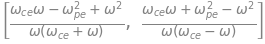

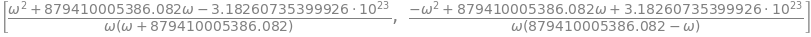

In [9]:
# Substitute kappa components with omega.
N2_with_omega = [
    de.subs_kappa_with_omega(sol) for sol in 
    de.solve_N2_with_specific_theta_and_kappa_component(0)] # <-- Set theta here
N2_with_omega

# Symbol results of omega singularities
[fualguti.find_singularities(sol, de.omega) for sol in N2_with_omega]

# Substitute constant parameters with accurate numerical values.
B, n_0 = 5, 1e20
N2_with_omega_univar = [
    sol\
    .subs(de.omega_ce, fupm.omega_ce(B=B)[0])\
    .subs(de.omega_pe, fupm.omega_pe(n_0=n_0, B=B)[0]) for sol in N2_with_omega]
N2_with_omega_univar

# Numerical result of omega singularities
omega_singularites = \
    [fualguti.find_singularities(sol, de.omega) for sol in N2_with_omega_univar]
omega_singularites 

In [10]:
InteractiveShell.ast_node_interactivity = 'last_expr' # do not print too much trash

<string>:2: RuntimeWarning: invalid value encountered in sqrt
<string>:2: RuntimeWarning: invalid value encountered in sqrt


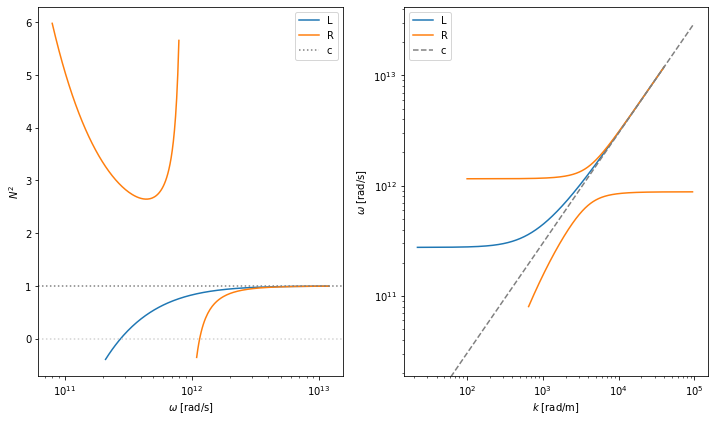

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6.8))

ax = axs[0]
draw_discontinuable_expr(
    N2_with_omega_univar, de.omega, 
    varlim=(0.8e11, 1.2e13), # limit of wave angular frequency, omega
    exprlim=(-0.4, 6.0), # limit of N^2, refraction index
    num=250,
    var_sample_scale='log', fig=fig, ax=ax, labels=['L', 'R'])
ax.axhline(y=0, color='lightgrey', linestyle=':')       # N^2 = 1
ax.axhline(y=1, color='grey', linestyle=':', label='c') # N^2 = 0
ax.set_xscale('log')
ax.set_xlabel('$\omega$ [rad/s]') 
ax.set_ylabel('$N^2$') 
ax.tick_params(axis='x', which='minor', bottom=True, labelbottom=True)
ax.legend()

ax = axs[1]
k_with_omega = [de.omega / c * sqrt(sol) for sol in N2_with_omega_univar]
draw_discontinuable_expr(
    k_with_omega, de.omega, 
    varlim=(0.8e11, 1.2e13), # limit of wave angular frequency, omega, rad/s
    exprlim=(0, 1e7),        # limit of wave vector length, k, rad/m
    num=int(1e4), var_is_yaxis=True,
    var_sample_scale='log', fig=fig, ax=ax, labels=['L', 'R'])
# Add a line corresponding to light in vacuum. 
add_line_with_slope(ax, c, num=500, color='grey', linestyle='--', label='c')
ax.set_xscale('log'); ax.set_yscale('log')
ax.set_xlabel('$k$ [rad/m]') 
ax.set_ylabel('$\omega$ [rad/s]') 
ax.tick_params(axis='x', which='minor', bottom=True, labelbottom=True)
ax.tick_params(axis='y', which='minor', left=True, labelleft=True)
ax.legend()